In [17]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [18]:
df = pd.read_csv('diabetes_indian.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
x = df.iloc[:,0:8]
y = df['Outcome']


In [20]:
from sklearn.preprocessing import MinMaxScaler as mm
mm = mm()
x = mm.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,shuffle=True,random_state=1,train_size=0.80)

In [22]:
model = Sequential()
model.add(Dense(100,input_dim=8,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy',metrics='accuracy')

In [24]:
history=model.fit(xtrain,ytrain,epochs=25)

Epoch 1/25
20/20 [==============================] - 0s 750us/step - loss: 0.6650 - accuracy: 0.6368
Epoch 2/25
20/20 [==============================] - 0s 662us/step - loss: 0.6350 - accuracy: 0.6531
Epoch 3/25
20/20 [==============================] - 0s 647us/step - loss: 0.6146 - accuracy: 0.6792
Epoch 4/25
20/20 [==============================] - 0s 682us/step - loss: 0.5958 - accuracy: 0.6857
Epoch 5/25
20/20 [==============================] - 0s 715us/step - loss: 0.5802 - accuracy: 0.7003
Epoch 6/25
20/20 [==============================] - 0s 785us/step - loss: 0.5685 - accuracy: 0.7036
Epoch 7/25
20/20 [==============================] - 0s 734us/step - loss: 0.5548 - accuracy: 0.7101
Epoch 8/25
20/20 [==============================] - 0s 745us/step - loss: 0.5508 - accuracy: 0.7182
Epoch 9/25
20/20 [==============================] - 0s 942us/step - loss: 0.5377 - accuracy: 0.7296
Epoch 10/25
20/20 [==============================] - 0s 780us/step - loss: 0.5285 - accuracy: 0.7280

In [25]:
model.evaluate(xtrain,ytrain)

20/20 [==============================] - 0s 661us/step - loss: 0.4797 - accuracy: 0.7638


[0.4796907603740692, 0.7638436555862427]

In [26]:
t = [1 if i > 0.5 else 0 for i in model.predict(xtest)  ]


5/5 [==============================] - 0s 754us/step


In [27]:
t

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1]

In [28]:
loss_val=history.history['loss']

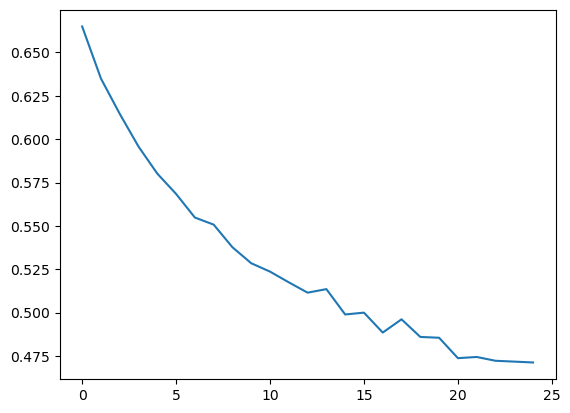

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(0,25),loss_val)